In [121]:
library(ggplot2)
library(RColorBrewer)
library(ggrepel)
library(dplyr)
library(scales)
library(ggpubr)
library(tidyr)
library(readr)
library(rstatix)
library(gghalves)
library(ggbeeswarm)
source("/fs/ess/PCON0160/ben/bin/mighty.R")
options(
  repr.plot.width  = 10,   # adjust width in inches
  repr.plot.height = 5, # smaller height gives a more compact look
  repr.plot.res    = 150  # DPI for clarity
)

In [122]:
dat = read_delim("./cleavage_analysis_master.new.tsv", delim = "\t")
conditions1 = read_delim("/fs/ess/PCON0160/ben/projects/2025_CSR_Y57_Y54/results/20251105/samples/replicates.csv", delim = ",")
conditions2 = read_delim("/fs/ess/PCON0160/ben/projects/2025_csr1_cleavage/00AA_AGO_cleavage/20250429/samples/replicates.csv", delim = ",")
conditions = rbind(conditions1, conditions2)
conditions %>% head()
conditions2 %>% head()

Rows: 4006 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): id, sample, sample_name
dbl (5): dist, sense_rpm, anti_rpm, sense_zscore, anti_zscore

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 17 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): simple_name, condition

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 12 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): simple_name, condition

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


simple_name,condition
<chr>,<chr>
CSR1_CD_input_1_S19_R1_001,CSR1_CD_input
CSR1_CD_input_2_S20_R1_001,CSR1_CD_input
CSR1_CD_IP_1_S21_R1_001,CSR1_CD_IP
CSR1_CD_IP_2_S22_R1_001,CSR1_CD_IP
CSR1_input_1_S15_R1_001,CSR1_input
CSR1_input_2_S16_R1_001,CSR1_input


simple_name,condition
<chr>,<chr>
csr1_input_1,csr1_input
csr1_input_2,csr1_input
csr1_input_3,csr1_input
csr1_IP_1,csr1_IP
csr1_IP_2,csr1_IP
csr1_IP_3,csr1_IP


In [123]:
dat %>% head() 

dist,sense_rpm,anti_rpm,sense_zscore,anti_zscore,id,sample,sample_name
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,63346.69,17065.81,1.768210,1.342476,5pto5p,CSR1_IP_1_S17_R1_001.trimmed.uniq.xartifacts.v2.m10.transcripts,CSR-1
2,88135.24,23262.28,3.251982,2.286445,5pto5p,CSR1_IP_1_S17_R1_001.trimmed.uniq.xartifacts.v2.m10.transcripts,CSR-1
3,77171.38,23436.06,2.483765,2.320846,5pto5p,CSR1_IP_1_S17_R1_001.trimmed.uniq.xartifacts.v2.m10.transcripts,CSR-1
4,58473.03,22873.59,1.568585,2.211336,5pto5p,CSR1_IP_1_S17_R1_001.trimmed.uniq.xartifacts.v2.m10.transcripts,CSR-1
5,67480.30,19674.63,1.957310,1.679843,5pto5p,CSR1_IP_1_S17_R1_001.trimmed.uniq.xartifacts.v2.m10.transcripts,CSR-1
6,58665.58,19067.12,1.576027,1.594395,5pto5p,CSR1_IP_1_S17_R1_001.trimmed.uniq.xartifacts.v2.m10.transcripts,CSR-1


In [124]:
dat %>% str()

spc_tbl_ [4,006 × 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ dist        : num [1:4006] 1 2 3 4 5 6 7 8 9 10 ...
 $ sense_rpm   : num [1:4006] 63347 88135 77171 58473 67480 ...
 $ anti_rpm    : num [1:4006] 17066 23262 23436 22874 19675 ...
 $ sense_zscore: num [1:4006] 1.77 3.25 2.48 1.57 1.96 ...
 $ anti_zscore : num [1:4006] 1.34 2.29 2.32 2.21 1.68 ...
 $ id          : chr [1:4006] "5pto5p" "5pto5p" "5pto5p" "5pto5p" ...
 $ sample      : chr [1:4006] "CSR1_IP_1_S17_R1_001.trimmed.uniq.xartifacts.v2.m10.transcripts" "CSR1_IP_1_S17_R1_001.trimmed.uniq.xartifacts.v2.m10.transcripts" "CSR1_IP_1_S17_R1_001.trimmed.uniq.xartifacts.v2.m10.transcripts" "CSR1_IP_1_S17_R1_001.trimmed.uniq.xartifacts.v2.m10.transcripts" ...
 $ sample_name : chr [1:4006] "CSR-1" "CSR-1" "CSR-1" "CSR-1" ...
 - attr(*, "spec")=
  .. cols(
  ..   dist = col_double(),
  ..   sense_rpm = col_double(),
  ..   anti_rpm = col_double(),
  ..   sense_zscore = col_double(),
  ..   anti_zscore = col_double(),
  ..   id

In [125]:
levels(factor(dat$sample))

[1] "CSR1_CD_input_1_S19_R1_001.trimmed.uniq.xartifacts.v0.m5.transcripts" 
 [2] "CSR1_CD_input_1_S19_R1_001.trimmed.uniq.xartifacts.v2.m10.transcripts"
 [3] "CSR1_CD_input_2_S20_R1_001.trimmed.uniq.xartifacts.v0.m5.transcripts" 
 [4] "CSR1_CD_input_2_S20_R1_001.trimmed.uniq.xartifacts.v2.m10.transcripts"
 [5] "CSR1_CD_IP_1_S21_R1_001.trimmed.uniq.xartifacts.v0.m5.transcripts"    
 [6] "CSR1_CD_IP_1_S21_R1_001.trimmed.uniq.xartifacts.v2.m10.transcripts"   
 [7] "CSR1_CD_IP_2_S22_R1_001.trimmed.uniq.xartifacts.v0.m5.transcripts"    
 [8] "CSR1_CD_IP_2_S22_R1_001.trimmed.uniq.xartifacts.v2.m10.transcripts"   
 [9] "CSR1_input_1_S15_R1_001.trimmed.uniq.xartifacts.v0.m5.transcripts"    
[10] "CSR1_input_1_S15_R1_001.trimmed.uniq.xartifacts.v2.m10.transcripts"   
[11] "csr1_input_1.trimmed.uniq.xartifacts.v2.m10.transcripts"              
[12] "CSR1_input_2_S16_R1_001.trimmed.uniq.xartifacts.v0.m5.transcripts"    
[13] "CSR1_input_2_S16_R1_001.trimmed.uniq.xartifacts.v2.m10.transcripts"   
[14] "csr1_input_2.trimmed.uniq.xartifacts.v2.m10.transcripts"              
[15] "csr1_input_3.trimmed.uniq.xartifacts.v2.m10.transcripts"              
[16] "CSR1_IP_1_S17_R1_001.trimmed.uniq.xartifacts.v0.m5.transcripts"       
[17] "CSR1_IP_1_S17_R1_001.trimmed.uniq.xartifacts.v2.m10.transcripts"      
[18] "csr1_IP_1.trimmed.uniq.xartifacts.v2.m10.transcripts"                 
[19] "CSR1_IP_2_S18_R1_001.trimmed.uniq.xartifacts.v0.m5.transcripts"       
[20] "CSR1_IP_2_S18_R1_001.trimmed.uniq.xartifacts.v2.m10.transcripts"      
[21] "csr1_IP_2.trimmed.uniq.xartifacts.v2.m10.transcripts"                 
[22] "csr1_IP_3.trimmed.uniq.xartifacts.v2.m10.transcripts"                 
[23] "wago9_input_1.trimmed.uniq.xartifacts.v2.m10.transcripts"             
[24] "wago9_input_2.trimmed.uniq.xartifacts.v2.m10.transcripts"             
[25] "wago9_input_3.trimmed.uniq.xartifacts.v2.m10.transcripts"             
[26] "wago9_IP_1.trimmed.uniq.xartifacts.v2.m10.transcripts"                
[27] "wago9_IP_2.trimmed.uniq.xartifacts.v2.m10.transcripts"                
[28] "wago9_IP_3.trimmed.uniq.xartifacts.v2.m10.transcripts"

In [126]:
dat %>% head()

dist,sense_rpm,anti_rpm,sense_zscore,anti_zscore,id,sample,sample_name
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,63346.69,17065.81,1.768210,1.342476,5pto5p,CSR1_IP_1_S17_R1_001.trimmed.uniq.xartifacts.v2.m10.transcripts,CSR-1
2,88135.24,23262.28,3.251982,2.286445,5pto5p,CSR1_IP_1_S17_R1_001.trimmed.uniq.xartifacts.v2.m10.transcripts,CSR-1
3,77171.38,23436.06,2.483765,2.320846,5pto5p,CSR1_IP_1_S17_R1_001.trimmed.uniq.xartifacts.v2.m10.transcripts,CSR-1
4,58473.03,22873.59,1.568585,2.211336,5pto5p,CSR1_IP_1_S17_R1_001.trimmed.uniq.xartifacts.v2.m10.transcripts,CSR-1
5,67480.30,19674.63,1.957310,1.679843,5pto5p,CSR1_IP_1_S17_R1_001.trimmed.uniq.xartifacts.v2.m10.transcripts,CSR-1
6,58665.58,19067.12,1.576027,1.594395,5pto5p,CSR1_IP_1_S17_R1_001.trimmed.uniq.xartifacts.v2.m10.transcripts,CSR-1


In [127]:
dat_grouped = dat %>% 
    filter(sample != "csr1_IP_1") %>% 
    rowwise() %>% 
    mutate(sample = strsplit(sample, "[.]")[[1]][1]) %>% 
    left_join(conditions, by = c("sample" = "simple_name")) %>% 
    group_by(condition, dist, id) %>% 
    summarise(sense_rpm = mean(sense_rpm), anti_rpm = mean(anti_rpm), sense_zscore = mean(sense_zscore), anti_zscore = mean(anti_zscore))

`summarise()` has grouped output by 'condition', 'dist'. You can override using
the `.groups` argument.


In [128]:
conditions

simple_name,condition
<chr>,<chr>
CSR1_CD_input_1_S19_R1_001,CSR1_CD_input
CSR1_CD_input_2_S20_R1_001,CSR1_CD_input
CSR1_CD_IP_1_S21_R1_001,CSR1_CD_IP
CSR1_CD_IP_2_S22_R1_001,CSR1_CD_IP
CSR1_input_1_S15_R1_001,CSR1_input
CSR1_input_2_S16_R1_001,CSR1_input
CSR1_IP_1_S17_R1_001,CSR1_IP
CSR1_IP_2_S18_R1_001,CSR1_IP
Y57A10A13_mut_1_S33_R1_001,Y57_mut


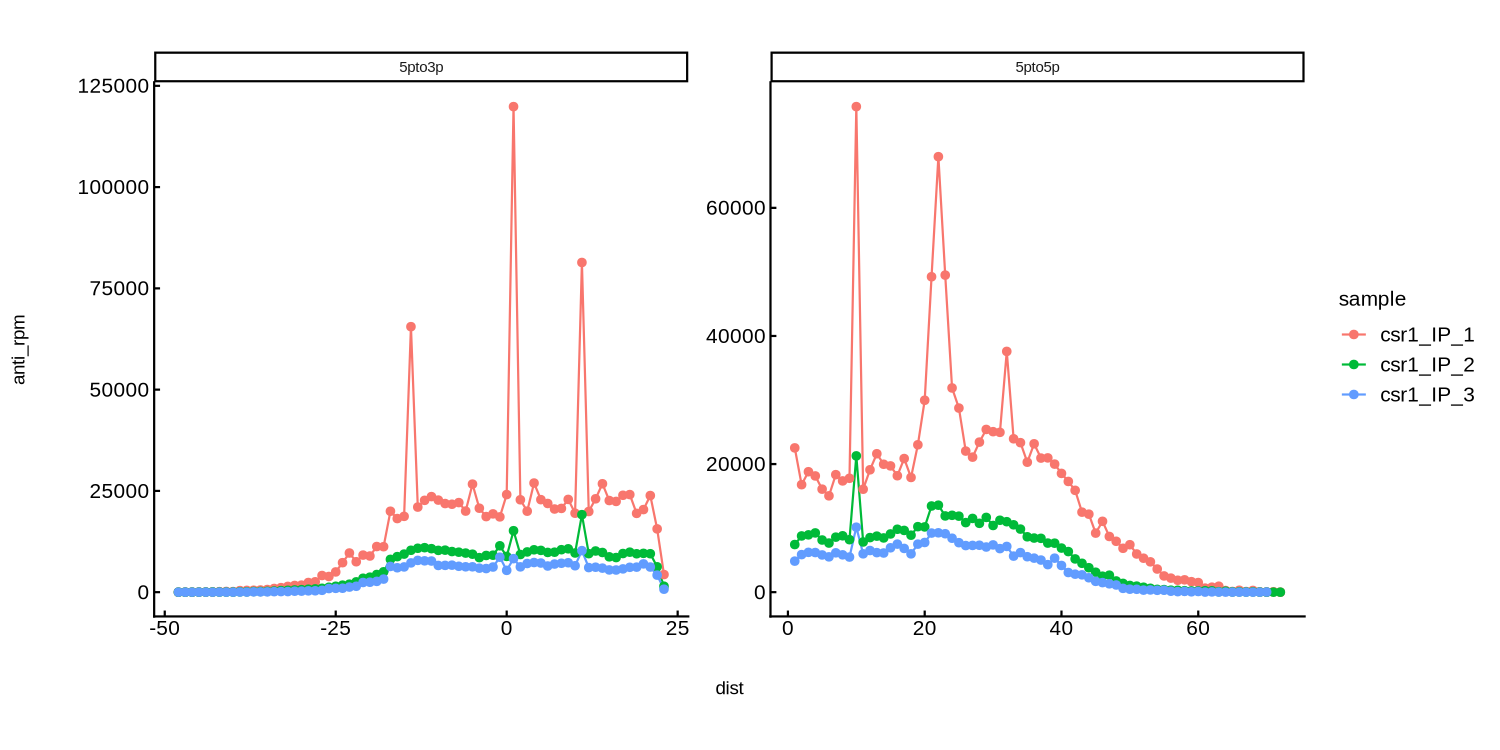

In [129]:
ggplot(data = dat %>% 
       filter(grepl("csr1_IP", sample)) %>% 
       rowwise() %>% 
       mutate(sample = strsplit(sample, '[.]')[[1]][1])
       , aes(x = dist, y = anti_rpm)) + 
    geom_line(aes(color = sample)) + 
    geom_point(aes(color = sample)) + 
    my_theme() + 
    facet_wrap(~id, scales = "free")

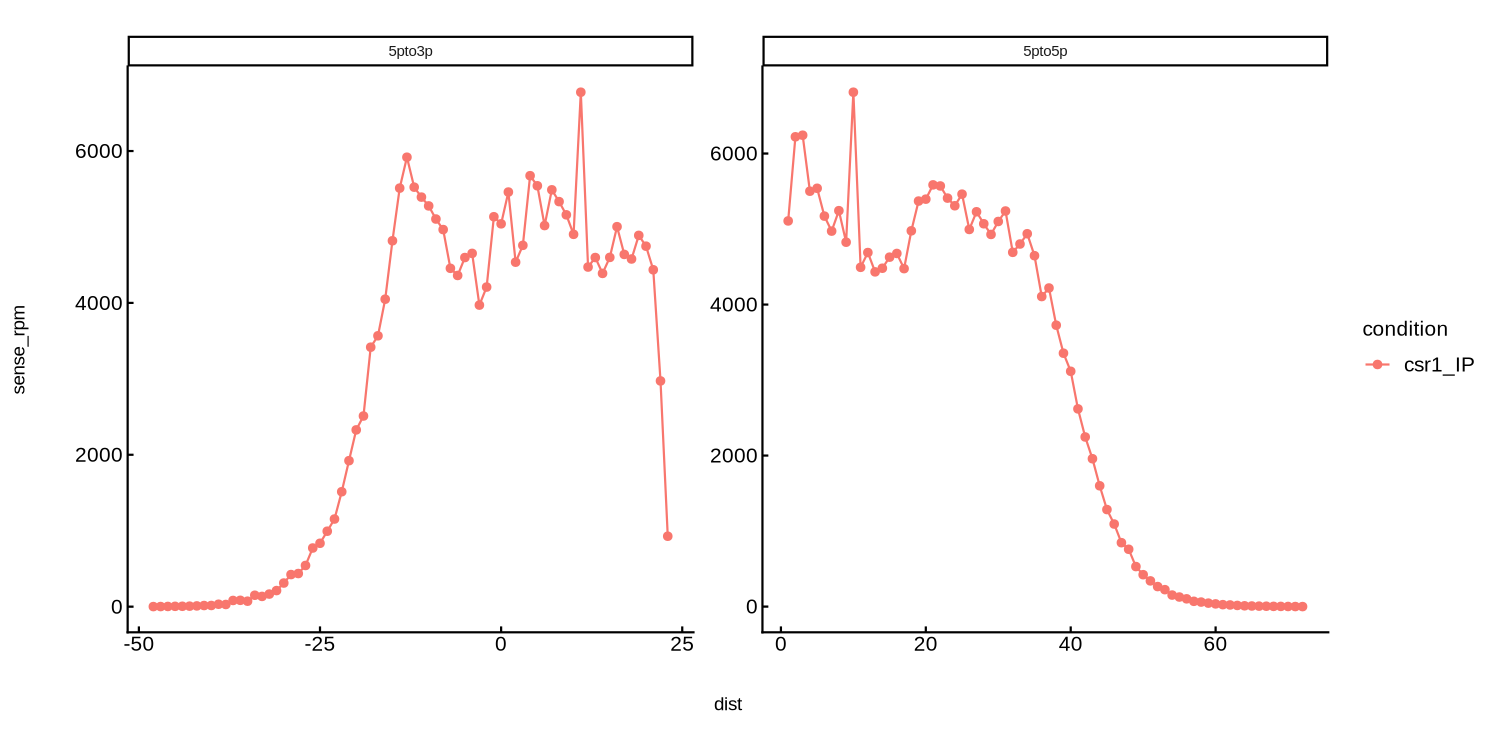

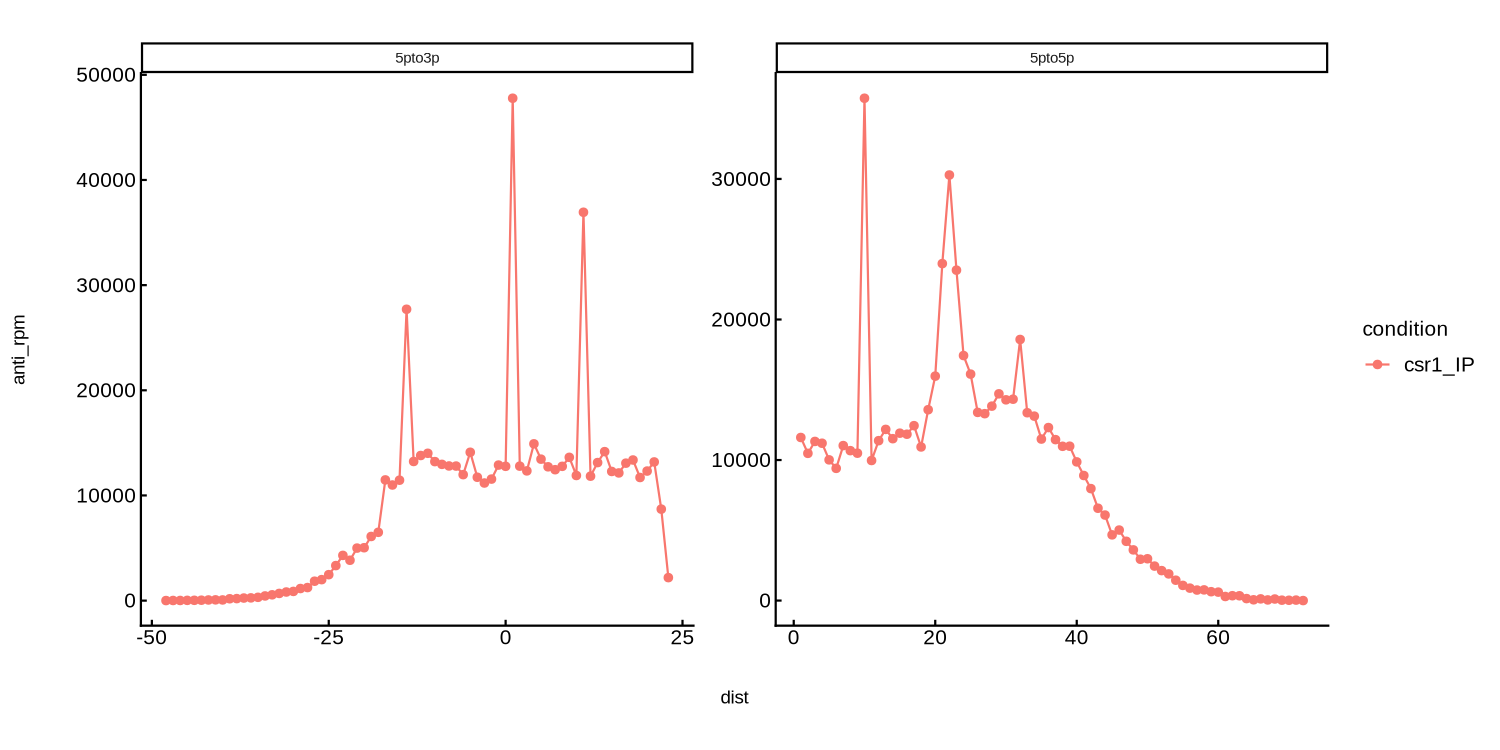

In [130]:
ggplot(data = dat_grouped %>% filter(condition == "csr1_IP"), aes(x = dist, y = sense_rpm)) + 
    geom_line(aes(color = condition)) + 
    geom_point(aes(color = condition)) + 
    my_theme() + 
    facet_wrap(~id, scales = "free")

ggplot(data = dat_grouped %>% filter(condition == "csr1_IP"), aes(x = dist, y = anti_rpm)) + 
    geom_line(aes(color = condition)) + 
    geom_point(aes(color = condition)) + 
    my_theme() + 
    facet_wrap(~id, scales = "free")